In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/quora project/train (1).csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 6)

In [5]:
df=df.sample(30000,random_state=2)

In [6]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
df=df.dropna(axis=0)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# preprocessing cleaning of texts columns

In [11]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    #stemming
    corpus=[]
    for word in q.split():
      word=WordNetLemmatizer().lemmatize(word)
      corpus.append(word)
    q=' '.join(corpus)

    
    # Replacing some numbers with string equivalents 
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [12]:
df['question1']=df['question1'].apply(preprocess)
df['question2']=df['question2'].apply(preprocess)

In [13]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...,0
151235,151235,237843,50930,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy,0


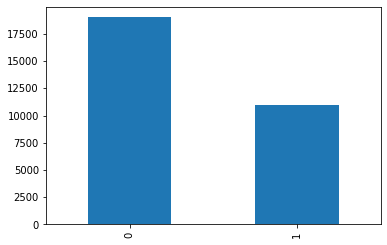

In [14]:
# Distribution of duplicate and non-duplicate questions

df['is_duplicate'].value_counts().plot(kind='bar')
plt.show()

In [15]:
# no of repeated and unique questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55299
Number of questions getting repeated 3480


In [16]:
# basic features
# no of words in each questions
df['q1_num_words']=df['question1'].apply(lambda x:len(x.split()))
df['q2_num_words']=df['question2'].apply(lambda x:len(x.split()))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,12,15
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,26,20
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...,0,13,30
151235,151235,237843,50930,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy,0,5,9


In [17]:
# no of characters in questions
df['q1_len'] = df['question1'].str.len() 
df['q2_len'] = df['question2'].str.len()
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13,75,76
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,12,15,48,56
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,26,20,104,119
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...,0,13,30,58,142
151235,151235,237843,50930,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy,0,5,9,33,48


In [18]:
# common words in ques 1 and ques 2
def common_words(row):
  set1=set(row['question1'].lower().strip().split())
  set2=set(row['question2'].split())
  return len(set1.intersection(set2))
  


In [19]:
df['word_common']=df.apply(common_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13,75,76,12
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,12,15,48,56,7
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,26,20,104,119,3
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...,0,13,30,58,142,0
151235,151235,237843,50930,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy,0,5,9,33,48,3


In [20]:
def total_words(row):
  set1=set(row['question1'].lower().strip().split())
  set2=set(row['question2'].lower().strip().split())
  return len(set1)+len(set2)

In [21]:
df['word_total']=df.apply(total_words,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common,word_total
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13,75,76,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,12,15,48,56,7,22
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,26,20,104,119,3,36
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...,0,13,30,58,142,0,32
151235,151235,237843,50930,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy,0,5,9,33,48,3,13


In [22]:
# common words share out of total unique words in both questions
df['word_share']=np.round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common,word_total,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13,75,76,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,12,15,48,56,7,22,0.32
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,26,20,104,119,3,36,0.08
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...,0,13,30,58,142,0,32,0.00
151235,151235,237843,50930,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy,0,5,9,33,48,3,13,0.23


In [23]:
# Analysis of features
df.describe()

,id,qid1,qid2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common,word_total,word_share
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000
mean,202411.998933,216685.498633,221520.533000,0.366233,11.153500,11.4264,58.122867,58.72440,5.123533,21.315933,0.251607
std,116730.715713,157776.920012,159768.171418,0.481782,5.591426,6.4797,29.725533,33.45198,3.124953,8.548409,0.126659
min,3.000000,7.000000,8.000000,0.000000,1.000000,0.0000,2.000000,0.00000,0.000000,4.000000,0.000000
25%,101702.000000,74504.250000,76293.000000,0.000000,7.000000,7.0000,38.000000,38.00000,3.000000,16.000000,0.160000
50%,202278.000000,191647.000000,198490.500000,0.000000,10.000000,10.0000,50.000000,50.00000,5.000000,19.000000,0.250000
75%,303515.250000,345192.500000,355006.750000,1.000000,13.000000,13.0000,70.000000,70.00000,7.000000,25.000000,0.350000
max,404279.000000,537920.000000,537921.000000,1.000000,73.000000,248.0000,390.000000,1154.00000,40.000000,126.000000,0.500000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


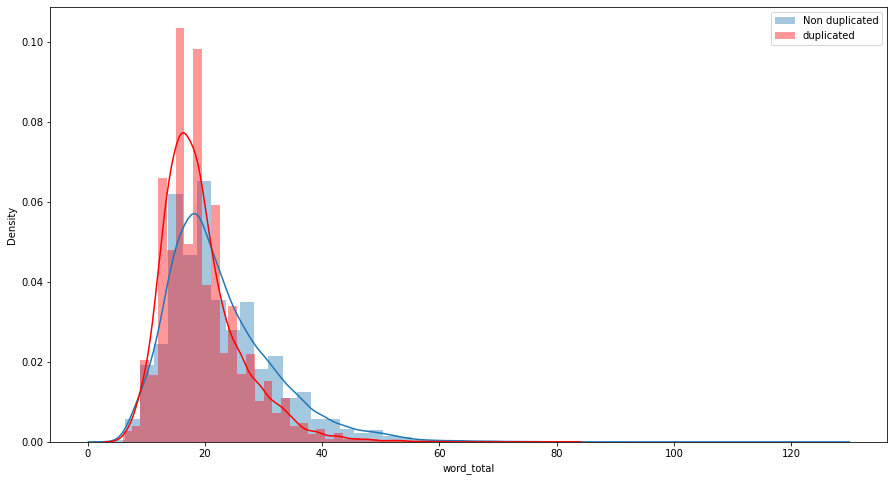

In [24]:
# distribution of total uniques words for each case
plt.figure(figsize=(15,8))
sns.distplot(df[df['is_duplicate']==0]['word_total'],label='Non duplicated')
sns.distplot(df[df['is_duplicate']==1]['word_total'],color='red',label='duplicated')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


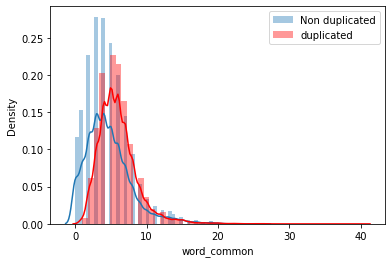

In [25]:

sns.distplot(df[df['is_duplicate']==0]['word_common'],label='Non duplicated')
sns.distplot(df[df['is_duplicate']==1]['word_common'],color='red',label='duplicated')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


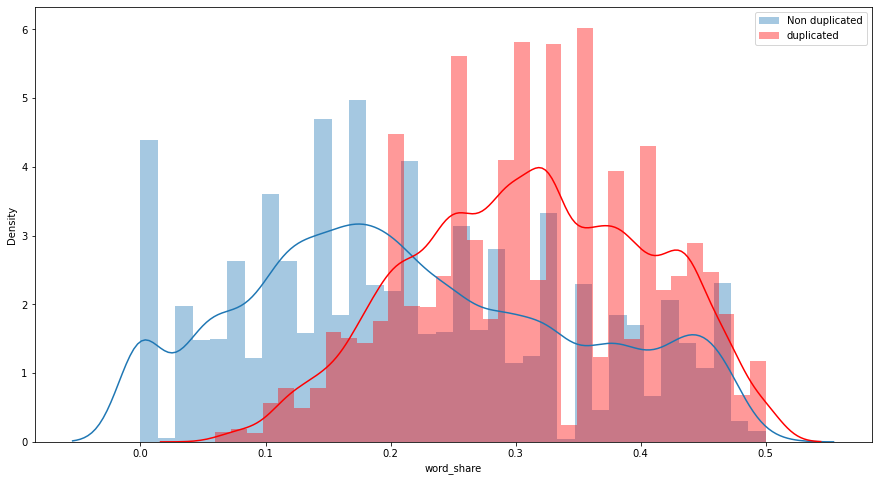

In [26]:
# word share
plt.figure(figsize=(15,8))
sns.distplot(df[df['is_duplicate']==0]['word_share'],label='Non duplicated')
sns.distplot(df[df['is_duplicate']==1]['word_share'],color='red',label='duplicated')
plt.legend()
plt.show()

In [25]:
# adding some advance features
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


def fetch_token_features(row):
  q1=row['question1']
  q2=row['question2']

  STOP_WORDS=stopwords.words('english')
  SAFE_DIV=0.0001

  token_features=[0.0]*8

  #convert sentence(question) into words

  q1_tokens=q1.split()
  q2_tokens=q2.split()

  if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

  # non stop words
  q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
  q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])

  #Get the stopwords in Questions
  q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
  q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

  #Getting common non_stop words
  common_word_count=len(q1_words.intersection(q2_words))

  # Get the common stopwords from Question pair
  common_stop_count = len(q1_stops.intersection(q2_stops))

  # Get the common Tokens from Question pair
  common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

  
  token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
  token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
  token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
  token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
  token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
  token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

  # Last word of both question is same or not
  token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
  token_features[7] = int(q1_tokens[0] == q2_tokens[0])
  
  return token_features





In [26]:
token_features=df.apply(fetch_token_features,axis=1)

In [27]:
token_features

398782    [0.874989062636717, 0.874989062636717, 0.99998...
115086    [0.6666444451851604, 0.49998750031249223, 0.71...
327711    [0.0, 0.0, 0.4285653062099113, 0.2727247934109...
367788                 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0]
151235    [0.7499812504687383, 0.49999166680555324, 0.0,...
                                ...                        
243932    [0.7499812504687383, 0.7499812504687383, 0.999...
91980     [0.5999880002399952, 0.4285653062099113, 0.199...
266955    [0.499993750078124, 0.499993750078124, 0.33332...
71112     [0.7499812504687383, 0.5999880002399952, 0.599...
312470    [0.5999940000599994, 0.49999583336805525, 0.19...
Length: 30000, dtype: object

In [28]:
df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [29]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13,75,76,...,26,0.46,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,12,15,48,56,...,22,0.32,0.666644,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,26,20,104,119,...,36,0.08,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...,0,13,30,58,142,...,32,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
151235,151235,237843,50930,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy,0,5,9,33,48,...,13,0.23,0.749981,0.499992,0.000000,0.000000,0.599988,0.333330,1.0,0.0


In [30]:
! pip install distance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
# Adding length features
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    if len(strs)!=0:
      
      length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else:
      length_features[2]=0
    
    return length_features
    

In [32]:
length_features=df.apply(fetch_length_features,axis=1)

In [33]:
df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13,75,76,...,0.874989,0.999980,0.999980,0.923070,0.923070,1.0,1.0,0.0,13.0,0.855263
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,12,15,48,56,...,0.499988,0.714276,0.624992,0.583328,0.466664,1.0,1.0,3.0,13.5,0.224490
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,26,20,104,119,...,0.000000,0.428565,0.272725,0.149999,0.115384,0.0,0.0,6.0,23.0,0.047619
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...,0,13,30,58,142,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,17.0,21.5,0.050847
151235,151235,237843,50930,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy,0,5,9,33,48,...,0.499992,0.000000,0.000000,0.599988,0.333330,1.0,0.0,4.0,7.0,0.558824


fuzz_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


fuzz_partial_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


token_sort_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

token_set_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

longest_substr_ratio : Ratio of length longest common substring to min lenghth of token count of Q1 and Q2
longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))

In [34]:
# Adding fuzzy_features
! pip install fuzzywuzzy
from fuzzywuzzy import fuzz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [35]:


def fetch_fuzzy_features(row):
  q1=row['question1']
  q2=row['question2']

  fuzzy_features=[0.0]*4

  #fuzz ratio
  fuzzy_features[0]=fuzz.QRatio(q1,q2)

  # fuzz_partial_ratio
  fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

  # token_sort_ratio
  fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

  # token_set_ratio
  fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

  return fuzzy_features


In [36]:
fuzzy_features=df.apply(fetch_fuzzy_features,axis=1)

In [37]:
# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [38]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13,75,76,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,12,15,48,56,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,26,20,104,119,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...,0,13,30,58,142,...,0.000000,0.0,0.0,17.0,21.5,0.050847,28,41,25,30
151235,151235,237843,50930,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy,0,5,9,33,48,...,0.333330,1.0,0.0,4.0,7.0,0.558824,57,71,49,71


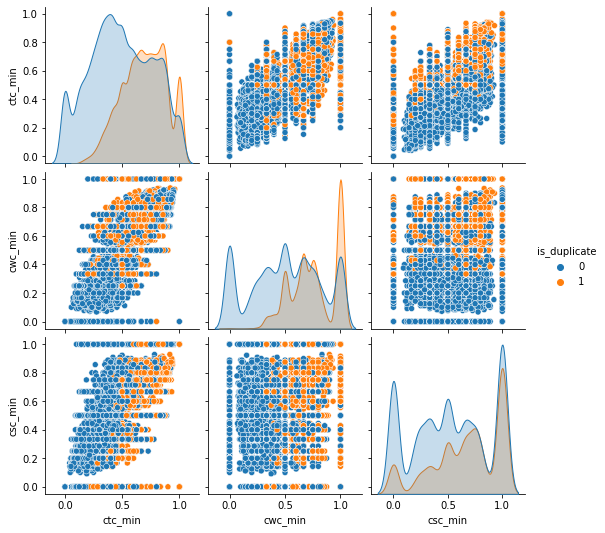

In [41]:
# Analyse features that we have added

sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')
plt.show()

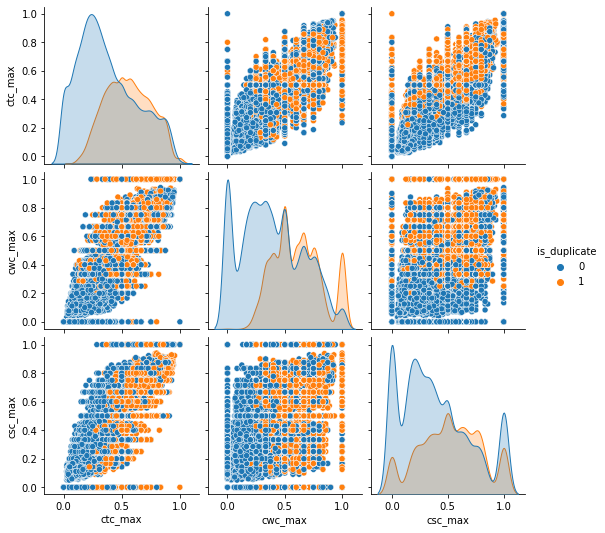

In [42]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

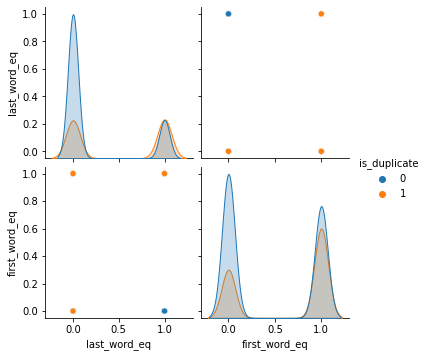

In [43]:
sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

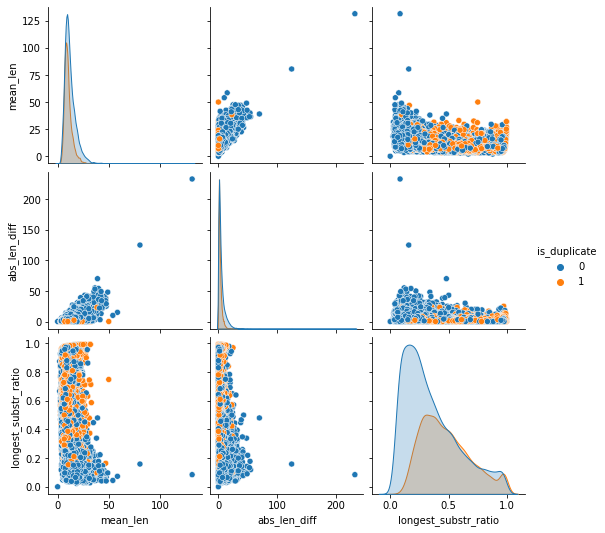

In [44]:
sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

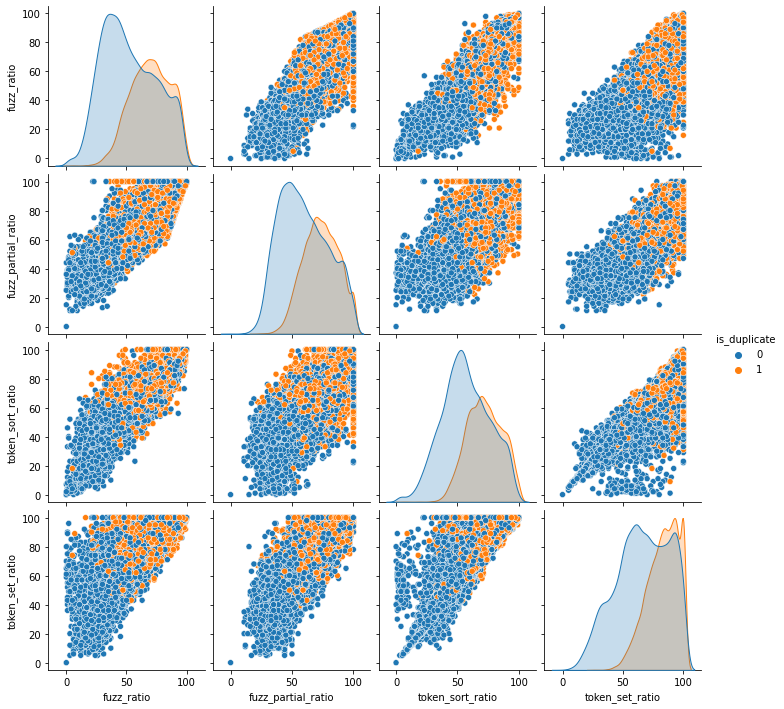

In [45]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [46]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13,75,76,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,12,15,48,56,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,26,20,104,119,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...,0,13,30,58,142,...,0.000000,0.0,0.0,17.0,21.5,0.050847,28,41,25,30
151235,151235,237843,50930,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy,0,5,9,33,48,...,0.333330,1.0,0.0,4.0,7.0,0.558824,57,71,49,71


In [39]:
df.corr()['is_duplicate']

id                     -0.015527
qid1                   -0.257412
qid2                   -0.266332
is_duplicate            1.000000
q1_num_words           -0.159511
q2_num_words           -0.161727
q1_len                 -0.172586
q2_len                 -0.157928
word_common             0.202984
word_total             -0.185805
word_share              0.363532
cwc_min                 0.402543
cwc_max                 0.405180
csc_min                 0.207761
csc_max                 0.209348
ctc_min                 0.364474
ctc_max                 0.352239
last_word_eq            0.306821
first_word_eq           0.204886
abs_len_diff           -0.200396
mean_len               -0.187781
longest_substr_ratio    0.266336
fuzz_ratio              0.381761
fuzz_partial_ratio      0.358037
token_sort_ratio        0.378712
token_set_ratio         0.394065
Name: is_duplicate, dtype: float64

In [40]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_num_words', 'q2_num_words', 'q1_len', 'q2_len', 'word_common',
       'word_total', 'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_len', 'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [41]:
ques_df=df[['question1','question2']]
ques_df.head()

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
327711,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurt m...
151235,consequence of bhopal gas tragedy,what wa the reason behind the bhopal gas tragedy


In [42]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,1,13,13,75,76,12,26,0.46,0.874989,0.874989,...,0.923070,1.0,1.0,0.0,13.0,0.855263,99,99,99,99
115086,0,12,15,48,56,7,22,0.32,0.666644,0.499988,...,0.466664,1.0,1.0,3.0,13.5,0.224490,69,67,65,74
327711,0,26,20,104,119,3,36,0.08,0.000000,0.000000,...,0.115384,0.0,0.0,6.0,23.0,0.047619,26,29,34,43
367788,0,13,30,58,142,0,32,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,17.0,21.5,0.050847,28,41,25,30
151235,0,5,9,33,48,3,13,0.23,0.749981,0.499992,...,0.333330,1.0,0.0,4.0,7.0,0.558824,57,71,49,71


In [44]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
#cv=CountVectorizer(max_features=3000)

questions = list(ques_df['question1']) + list(ques_df['question2'])


q1_arr, q2_arr = np.vsplit(tfidf.fit_transform(questions).toarray(),2)

In [45]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [46]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()


(30000, 6023)


,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,13,13,75,76,12,26,0.46,0.874989,0.874989,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115086,0,12,15,48,56,7,22,0.32,0.666644,0.499988,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327711,0,26,20,104,119,3,36,0.08,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367788,0,13,30,58,142,0,32,0.00,0.000000,0.000000,...,0.0,0.167118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151235,0,5,9,33,48,3,13,0.23,0.749981,0.499992,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [48]:
# MODELS
# RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7881666666666667

In [ ]:
#Xgboost

In [50]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7608333333333334